In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv
/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv


In [109]:
# Importing the Datasets

import pandas as pd
Movies = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv")
Reviews = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv")

In [110]:
list(Reviews.columns)

['rotten_tomatoes_link',
 'critic_name',
 'top_critic',
 'publisher_name',
 'review_type',
 'review_score',
 'review_date',
 'review_content']

In [111]:
Movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [112]:
import numpy as np

# Dropping rows with NA values
Reviews = Reviews.dropna()

# Dropping Duplicates so that there is only one entry per Movie.
Reviews = Reviews.drop_duplicates(subset=['rotten_tomatoes_link'], keep = "first")
Reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
153,m/0878835,Erik Childress,False,eFilmCritic.com,Fresh,3/4,2010-01-31,Holofcener always gives us more to chew on tha...
292,m/10,Scott Weinberg,False,eFilmCritic.com,Fresh,4/5,2002-07-25,Obvious but entertaining portrayal of midlife ...
316,m/1000013-12_angry_men,Steve Rhodes,False,Internet Reviews,Fresh,4/4,2000-01-01,In a time of bloated when special effects have...
369,m/1000079-20000_leagues_under_the_sea,Dragan Antulov,False,rec.arts.movies.reviews,Fresh,7/10,2000-01-01,[The] embodiment of Disney at his best -- fami...


In [113]:
# Merging two Dataframes
newDf = pd.merge(Movies, Reviews, on = "rotten_tomatoes_link", how = "inner") 

# Dropping columns which are not required
newDf.drop(['movie_info','content_rating','genres','directors','authors','actors','original_release_date','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','critic_name','top_critic','publisher_name','review_type','review_date','streaming_release_date','runtime','production_company','tomatometer_status','tomatometer_rating','tomatometer_count','audience_status','audience_rating','audience_count'],axis=1,inplace=True)
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...


In [114]:
# Fetching unique rating scale to generalize the rating
ratingList = np.unique(newDf.review_score).tolist()
max_score = []
for r in range(len(ratingList)):
    temp = ratingList[r].split("/")
    if len(temp) > 1:
        max_score.append(temp[1])
    elif len(temp) == 1:
        max_score.append(temp)
    else:
        pass
    
max_score = [i for b in map(lambda x:[x] if not isinstance(x, list) else x, max_score) for i in b]
uniq_score = np.unique(max_score)
uniq_score

array(['1', '10', '100', '20', '3', '4', '5', '6', '7', '8', '9', 'A',
       'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F'],
      dtype='<U3')

In [115]:
# Generalizing the all the review ratings to standard scale of 5 being highest and 0 being least.
rating = newDf.review_score.tolist()
genrat = []
for r in range(len(rating)):
    temp = rating[r].split("/")
    #print(len(temp))
    if len(temp) > 1:
        if temp[1] == '10':
            score = round(float(temp[0]) / 2)
            genrat.append(score)
        elif temp[1] == '100':
            score = round(float(temp[0]) / 20)
            genrat.append(score)
        elif temp[1] == '20':
            score = round(float(temp[0]) / 4)
            genrat.append(score)
        elif temp[1] == '3':
            score = round(float(temp[0]) * 5 / 3)
            genrat.append(score)
        elif temp[1] == '4':
            score = round(float(temp[0]) * 5 / 4)
            genrat.append(score)
        elif temp[1] == '5':
            score = round(float(temp[0]))
            genrat.append(score)
        elif temp[1] == '6':
            score = round(float(temp[0]) * 5 / 6)
            genrat.append(score)
        elif temp[1] == '7':
            score = round(float(temp[0]) * 5 / 7)
            genrat.append(score)
        elif temp[1] == '8':
            score = round(float(temp[0]) * 5 / 8)
            genrat.append(score)
        elif temp[1] == '9':
            score = round(float(temp[0]) * 5 / 9)
            genrat.append(score)
    elif len(temp) == 1:
        if temp == 'A-' or 'A' or 'A+':
            score = 5
            genrat.append(score)
        elif temp == 'B-' or 'B' or 'B+':
            score = 4
            genrat.append(score)
        elif temp == 'C-' or 'C' or 'C+':
            score = 3
            genrat.append(score)
        elif temp == 'D-' or 'D' or 'D+':
            score = 2
            genrat.append(score)
        elif temp == 'F-' or 'F' or 'F+':
            score = 1
            genrat.append(score)
        else :
            score = temp
            genrat.append(score)
        
           
    
    

In [116]:
newDf['Standard_rating'] = genrat
#newDf = newDf[:2000]

In [117]:
'''# Preprocessing of Data

import spacy
import numpy as np
#from spacy.lang.en.stop_words import STOP_WORDS
#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])
def preprocess(text):
    # TODO: Replace the next line with your own code.
    doc = nlp(text)
    token_list = []
    for token in doc:
        if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:
            token_list.append(token.lemma_)
    return(token_list)'''

'# Preprocessing of Data\n\nimport spacy\nimport numpy as np\n#from spacy.lang.en.stop_words import STOP_WORDS\n#nlp = en_core_web_sm.load()\nnlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])\ndef preprocess(text):\n    # TODO: Replace the next line with your own code.\n    doc = nlp(text)\n    token_list = []\n    for token in doc:\n        if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:\n            token_list.append(token.lemma_)\n    return(token_list)'

In [118]:
'''newDf['PreProcessedReview'] = None
for i in range(len(newDf)):
    newDf['PreProcessedReview'][i] = " ".join(preprocess(newDf['review_content'][i]))'''

'newDf[\'PreProcessedReview\'] = None\nfor i in range(len(newDf)):\n    newDf[\'PreProcessedReview\'][i] = " ".join(preprocess(newDf[\'review_content\'][i]))'

In [119]:
# Balancing Dataset by removing the Movies which has rating 0 and 1 
# since the number of movies available for each of the rating is very less
newDf = newDf[newDf.Standard_rating != 0]
newDf = newDf[newDf.Standard_rating != 1]
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content,Standard_rating
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...,4
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...,4
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...,4
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...,5
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...,4


In [120]:
# Balancing the Dataset such that there are equal(almost equal) number of movies for each rating
g = newDf.groupby('Standard_rating')
bal_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

In [121]:
def std_rating(rating):
    rating = int(rating)
    if rating <= 3:
        return 0
    else: 
        return 1

# Reassigning the ratings of movies <=3 to 0 and 4-5 to 1(Multilabel to Binary Label) because for BERT outputs softmax probability for each rating
# and in order to pick the maximum probablity index.

bal_data['Standard_rating'] = bal_data.Standard_rating.apply(std_rating)

In [122]:
#reviews = bal_data.PreProcessedReview.values
reviews = bal_data.review_content.values
labels = bal_data.Standard_rating.values

In [123]:
# train-test split
from sklearn.model_selection import train_test_split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, labels, 
                                                                                          test_size=0.2, 
                                                                                          stratify=labels)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

vectorizer = CountVectorizer()
pipe_LR = Pipeline([('countvectorizer', vectorizer),('LR',LogisticRegression())])
parameters = dict(countvectorizer__binary = [True,False],
    countvectorizer__ngram_range=[(1, 2),(2,2)],
                 LR__penalty = ['l1', 'l2', 'elasticnet'],
                 LR__solver = ['newton-cg','lbfgs','liblinear','saga'],
                 LR__multi_class = ['multinomial'])
clf = GridSearchCV(pipe_LR, parameters)
clf.fit(train_sentences, train_labels)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__multi_class': ['multinomial'],
                         'LR__penalty': ['l1', 'l2', 'elasticnet'],
                         'LR__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'saga'],
                         'countvectorizer__binary': [True, False],
                         'countvectorizer__ngram_range': [(1, 2), (2, 2)]})

In [30]:
print("The best model has below paramaters \n",clf.best_params_)

The best model has below paramaters 
 {'LR__multi_class': 'multinomial', 'LR__penalty': 'l2', 'LR__solver': 'saga', 'countvectorizer__binary': True, 'countvectorizer__ngram_range': (1, 2)}


In [126]:
vectorizer = CountVectorizer()
pipe_LR = Pipeline([('countvectorizer', vectorizer),('LR',LogisticRegression())])
tuned_parameters = dict(countvectorizer__binary = [True],
    countvectorizer__ngram_range=[ (1, 2)],
                  LR__max_iter = [1000],
                 LR__penalty = ['l2'],
                 LR__solver = ['saga'],
                 LR__multi_class = ['multinomial'])
clf = GridSearchCV(pipe_LR, tuned_parameters)
clf.fit(train_sentences, train_labels)
pred_LR = clf.predict(validation_sentences)
print(classification_report(validation_labels, pred_LR))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1226
           1       0.66      0.64      0.65      1225

    accuracy                           0.66      2451
   macro avg       0.66      0.66      0.66      2451
weighted avg       0.66      0.66      0.66      2451



In [32]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([('countvectorizer', vectorizer),('SVC',SVC())])
parameters = dict(countvectorizer__binary = [True,False],
    countvectorizer__ngram_range=[(1, 1), (1, 2),(2,2)],
                  SVC__kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                  SVC__gamma = ['auto','scale']
                 )
clf = GridSearchCV(pipe_SVC, parameters)
clf.fit(train_sentences, train_labels)
print("The best model has below paramaters \n",clf.best_params_)

The best model has below paramaters 
 {'SVC__gamma': 'auto', 'SVC__kernel': 'linear', 'countvectorizer__binary': False, 'countvectorizer__ngram_range': (1, 2)}


In [128]:
pipe_SVC = Pipeline([('countvectorizer', vectorizer),('SVC',SVC())])
tuned_parameters = dict(countvectorizer__binary = [False],
    countvectorizer__ngram_range=[(1, 2)],
                  SVC__kernel = [ 'linear'],
                 SVC__gamma = ['auto']
                 )
clf = GridSearchCV(pipe_SVC, tuned_parameters)
clf.fit(train_sentences, train_labels)
pred_SVC = clf.predict(validation_sentences)
print(classification_report(validation_labels, pred_SVC))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1226
           1       0.64      0.63      0.64      1225

    accuracy                           0.64      2451
   macro avg       0.64      0.64      0.64      2451
weighted avg       0.64      0.64      0.64      2451



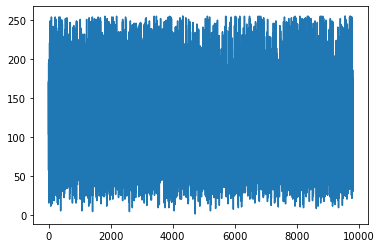

In [129]:
# Plot of length of reviews

senlen = [len(train_sentences[i]) for i in range(len(train_sentences))]

import matplotlib.pyplot as plt

plt.plot(np.arange(len(senlen)),senlen)

In [130]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
#from pytorch_pretrained_bert import BertModel
from torch import nn
#from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [131]:
! pip install transformers==3

In [132]:
from transformers import BertTokenizer, BertModel, BertConfig
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [133]:
# Tokenizing inputs and adding special tokens

def input_id(input_review):
    input_ids = []
    MAX_LEN = 256
    for r in input_review:
        encoded_sent = tokenizer.encode(r,add_special_tokens = True) # Special tokens '[CLS]' and '[SEP]'
        input_ids.append(encoded_sent)
    return input_ids
train_id = input_id(train_sentences)
val_id = input_id(validation_sentences)

In [134]:
# Padding the Tokenized IDs
from keras.preprocessing.sequence import pad_sequences
padded_train_id = pad_sequences(train_id, maxlen=256 , truncating="post", padding="post")
padded_val_id = pad_sequences(val_id, maxlen=256 , truncating="post", padding="post")


In [135]:
# Masking the padded ID's

def masking(pid):
    attention_masks = []

    for r in pid:
    
        # Generating attention mask for sentences.
        #   - when there is 0 present as token id we are going to set mask as 0.
        #   - we are going to set mask 1 for all non-zero positive input id.
        att_mask = [int(token_id > 0) for token_id in r]
        attention_masks.append(att_mask)

    return attention_masks

train_mask = masking(padded_train_id)
val_mask = masking(padded_val_id)

In [136]:
#changing the numpy arrays into tensors for working on GPU.
import torch

tr_inputs = torch.tensor(padded_train_id)
val_inputs = torch.tensor(padded_val_id)

tr_labels = torch.tensor(train_labels.reshape(-1, 1)).float()
val_labels = torch.tensor(validation_labels.reshape(-1, 1)).float()

tr_masks = torch.tensor(train_mask)
val_masks = torch.tensor(val_mask)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.

batch_size = 8

#DataLoader for our training set.
train_data = TensorDataset(tr_inputs, tr_masks, tr_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# DataLoader for our validation(test) set.
validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [137]:
# Building custom BERT model with additional Classification layer

class BertClassifier(nn.Module):
    
    def __init__(self, n_classes = 2):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768, n_classes)
        self.softmax = nn.Softmax(dim=1)
  
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        #print(torch.max(output,dim = 1))
        return self.out(output)

In [138]:
# Checking for GPU processors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run


In [139]:
# Assigning model to GPU

model = BertClassifier()
model = model.to(device)

In [140]:

EPOCHS = 5

optimizer = Adam(model.parameters(), lr=3e-6)
total_steps = len(train_dataloader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)

In [141]:
# Training the Model

for epoch_num in range(EPOCHS):
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)
        #print(type(masks))
        outputs = model(
      token_ids,
      masks
    )
        #print(len(targets))
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets[0])

        train_loss += loss.item()
        
        
        model.zero_grad()
        loss.backward()
        

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / batch_size, train_loss / (step_num + 1)))

Epoch:  5
1225/1225.125 loss: 0.4035313539176596 


In [142]:
# Evaluating and Predicting the Movie Ratings for Validation data

model.eval()
bert_predicted = []
with torch.no_grad():
    for step_num, batch_data in enumerate(validation_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        bert_predicted.append(preds)
    
pred = []
for i in range(len(bert_predicted)):
    for j in range(len(bert_predicted[i])):
        pred.append(bert_predicted[i][j])
    
pred = torch.tensor(pred).numpy()       

In [143]:
print("Classification Report for BERT BASE UNCASED model\n\n",classification_report(val_labels, pred))

Classification Report for BERT BASE UNCASED model

               precision    recall  f1-score   support

         0.0       0.71      0.65      0.68      1226
         1.0       0.68      0.74      0.71      1225

    accuracy                           0.69      2451
   macro avg       0.69      0.69      0.69      2451
weighted avg       0.69      0.69      0.69      2451

